<a href="https://colab.research.google.com/github/MEDA-NAVADURGA/CODSOFT/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC SURVIVAL PREDICTION:=
=================================

problem statement:-
--------------------
   1) Use the Titanic dataset to build a model that predicts whether a
     passenger on
   
   2)the Titanic survived or not. This is a classic beginner
     project with readily available data.
   
   3)The dataset typically used for this project contains information
     about individual passengers,
     such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

processing steps:-
======================
  1) importing required libraries.
  
  2) read dataset.
  
  3) data pre-processing.
  
  4) Splitting the Dataset.
  
  5) Training the Logistic Regression Model.
  
  6) Prediction.
  
  7) Validation.
  
  8) Confusion Matrix.
  
  9) Confusion Matrix Visualisation using HeatMap.
  

In [1]:
#importing required libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.size

10692

In [9]:
df.shape

(891, 12)

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)   # Datatype Conversion

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Sex'] = df['Sex'].map({'male':1,'female':0}).astype(int) # Converting categorical data to quantitative data

In [17]:
df['Embarked'].unique() # Handling Embarked column, replacing S,C,Q classes using one hot encoding

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
df['Embarked'].fillna("S",inplace=True)
df =pd.get_dummies(df,columns=['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                                                 ...  .

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


Splitting the Dataset:-
============================

In [22]:
df2 = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked_C', 'Embarked_Q','Embarked_S']]
df2.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [23]:
X = df2.iloc[:,:].values
y = df['Survived'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Training the Logistic Regression Model:-
===========================================

In [24]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Prediction:-
=================

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(df1)

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         1          1
4         1          1
..      ...        ...
174       1          1
175       0          0
176       1          1
177       0          0
178       0          0

[179 rows x 2 columns]


Validation:-
=================

In [27]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy is: ",acc)

Accuracy is:  0.7821229050279329


Confusion Matrix:-
===================

In [28]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn,fp,fn,tp)
print(" ")
print("True Positive value is: ",tp)
print("True Negative value is: ",tn)
print("False Positive value is: ",fp)
print("False Negative value is: ",fn)

92 18 21 48
 
True Positive value is:  48
True Negative value is:  92
False Positive value is:  18
False Negative value is:  21


In [29]:
precision = (tp)/((tp+fp))
print("Precision is: ",precision)    #Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.

Precision is:  0.7272727272727273


In [30]:
recall = (tp)/((tp+fn))
print("Recall is: ",recall)   #Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive)

Recall is:  0.6956521739130435


Confusion Matrix Visualisation using HeatMap:-
======================================================

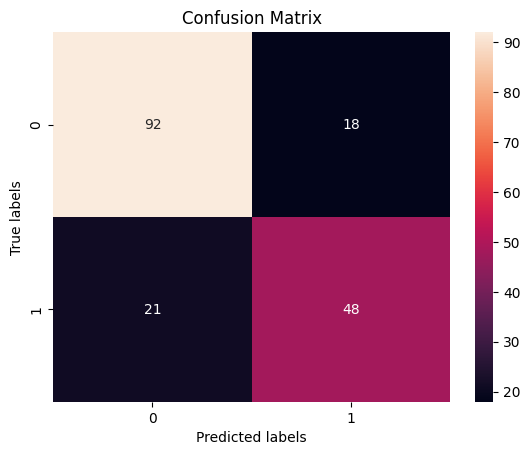

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

Conclusion:-
=================
    From the above results we can state that:
    -----------------------------------------------
    1) Our model predicts (True Positive) 48 True values as True.
    
    Where as it predicts (True Negative) 92 False values as False.
    2) False positive values are quite low (18) which means that our model predict 18 True as False. It is also known as Type I error.
    Also False negative values are quite low too (21) which means that our model predict 21 False values as True which is also known as Type II error.